In [33]:
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('train.csv')
display(data)
# Обробка пропущених значень
data['Age'] = data['Age'].fillna(data['Age'].median())  # Заповнення пропусків у колонці 'Age' медіаною
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])  # Заповнення пропусків у колонці 'Embarked' модою

# Кодування категоріальних змінних
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])  # перетворення 'Sex' на числові значення
data['Embarked'] = le.fit_transform(data['Embarked'])  # перетворення 'Embarked' на числові значення

# Вибір ознак та цільової змінної
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = data['Survived']

# Розділення на тренувальні та тестові дані
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Перевірка результату попередньої обробки даних
display(X_train.head()), y_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,1,45.5,0,0,28.5000,2
733,2,1,23.0,0,0,13.0000,2
382,3,1,32.0,0,0,7.9250,2
704,3,1,26.0,1,0,7.8542,2
813,3,0,6.0,4,2,31.2750,2


(None,
 331    0
 733    0
 382    0
 704    0
 813    0
 Name: Survived, dtype: int64)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Створення та навчання моделі логістичної регресії
model = LogisticRegression(max_iter=200, random_state=42)
model.fit(X_train, y_train)

# Прогнозування на тестовому наборі даних
y_pred = model.predict(X_test)

# Оцінка точності моделі
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Виведення результатів
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.8100558659217877
Confusion Matrix:
 [[90 15]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



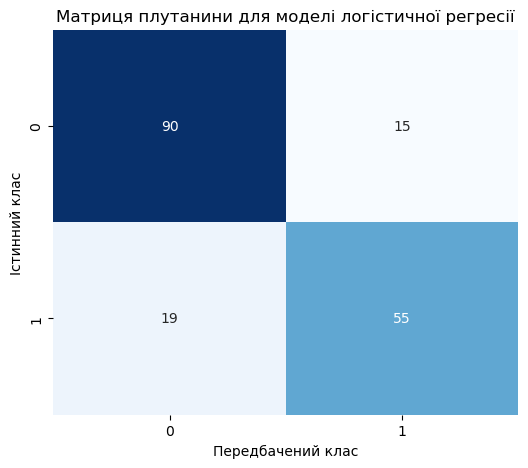

In [35]:
# Візуалізація матриці плутанини
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Передбачений клас")
plt.ylabel("Істинний клас")
plt.title("Матриця плутанини для моделі логістичної регресії")
plt.show()


In [36]:
from sklearn.metrics import log_loss, brier_score_loss

y_prob = model.predict_proba(X_test)[:, 1]

log_loss_value = log_loss(y_test, y_prob)
brier_score = brier_score_loss(y_test, y_prob)

log_loss_value, brier_score


(0.4169433747128013, 0.13116909210338062)

In [37]:
import numpy as np
import pandas as pd


random_indices = np.random.choice(X_test.index, size=5, replace=False)
sample_data = X_test.loc[random_indices]


sample_predictions = model.predict(sample_data)
sample_probabilities = model.predict_proba(sample_data)


results = pd.DataFrame({
    'Index': random_indices,
    'Predicted Class': sample_predictions,
    'Probability Class 0': sample_probabilities[:, 0],
    'Probability Class 1': sample_probabilities[:, 1]
})


print(results)


   Index  Predicted Class  Probability Class 0  Probability Class 1
0    845                0             0.926152             0.073848
1    296                0             0.821899             0.178101
2     67                0             0.861466             0.138534
3    653                1             0.328822             0.671178
4     25                0             0.646352             0.353648
